<center><font size="16">Human Resource Analysis</font></center>

Companies want to improve and maintain a healthy relationship and environment for their employees. This can be achieved by recognizing and understanding the important factors that are associated with employee turnover and taking care of them might add into the productivity and growth of the employees. These insights can help managers for grabing the opportunity to take corrective steps to build and preserve their successful business. 
<br><br>
In this notebook, we will work on the project that is based on understanding what factors contributed most to employee turnover and to create a model that can predict if a certain employee will leave the company or not.<br><br>

### Column Description

- satisfacion_level: Showing satisfaction of a particular employee
- last_evaluation: Showing last evaluation of a particular employee
- number_project: Showing number of projects handled a particular employee
- average_montly_hours: Showing the monthly hours that were spent the particular emloyee
- time_spend_company: Shows the number of years spent by the particular employee in the company.
- Work_accident: Showing an employee has whether been part of the company or not.
- left: Tells either and employee has left the company or not. Shows two values 0= not left, 1= left
- promotion_last_5years: Shows that the whether the employee has got any promotion in the last 5 years or not.
- dept: Shows the departments
- salary: Shows the salary type of the employee

# Wrangling & EDA

## 1. Loading Packages

In [730]:
#Write code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## 2. Loading Data & Basic Analysis

- **Task 1**:Load the data and after making a copy of it, find **shape, data types, basic statistics, and null values** from the data set

In [731]:
# Load the data
data= pd.read_csv('HR_comma_sep.csv')
df= data.copy()

In [732]:
# Find the shape
df.shape

(14999, 10)

In [733]:
# Display the top 5 rows.
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [734]:
# Find the data types of columns
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object

In [735]:
# Find the basic statistics
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [736]:
# Find the null values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

# 3. Exploration

Before moving ahead, let us check the details of different variables in the data

**Task 2: Find out the how many employees left the company?**

In [737]:
# Count of how many employees left the company
df.loc[df['left']==1,'left'].count()

3571

**Question:What can you interpret from the plot above?** 

Answer: As we already know left=1 gives us the data about the employees left the company. So after filtering the data we can count that total of 3571 employees left the company.

**Task 3: Find out the number of projects being handled.**

<Axes: xlabel='number_project', ylabel='count'>

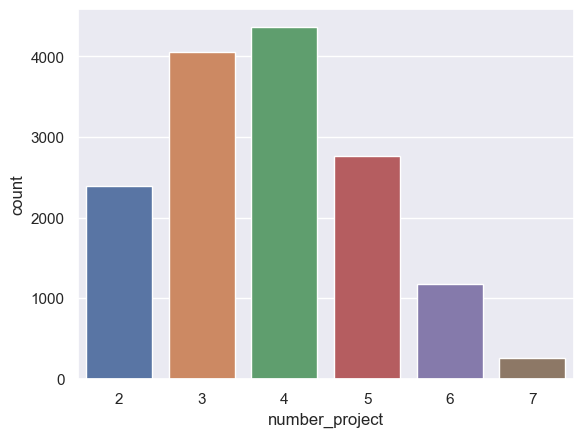

In [738]:
# Write code here
sns.countplot(data=df,x='number_project')

**Question: What insights can you infer from the above plot?**

**Answer:** From the above plot we can count more than 4000 employees completed 4 projects.

**Task 4: Find out how number of projects contributed to employee turn-over.**
<br>
<br>

In [917]:
#number of turn-over employees in every number project
df.groupby('number_project')['left'].sum()


number_project
2    1567
3      72
4     409
5     612
6     655
7     256
Name: left, dtype: int64

**Task 5:** Make a plot of your findings (only turn-over employees)

In [740]:
temp = df.loc[df['left']==1]

<Axes: xlabel='number_project', ylabel='left'>

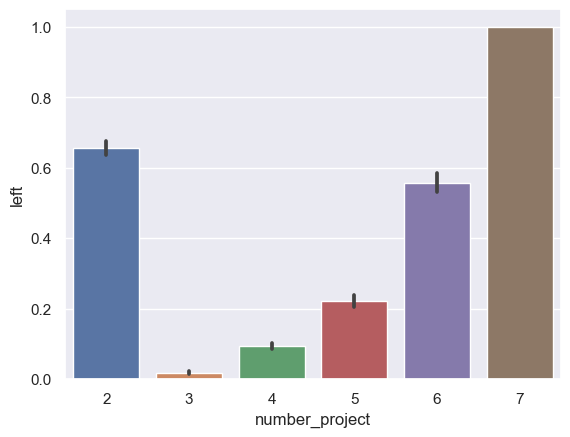

In [741]:
sns.barplot(data=df,x='number_project',y='left')

**Question: What can you conclude from the above graph? Which people are leaving the company(as per number of projects)? What can be the reasons behind?**

Answer: The people who have have completed 2, 6, 7 projects are leaving the most. We can observe the number of peoples in specific project types and percentage of them leaving the company in the obove graph. The reason can be that employees with 2 projects were finding it difficult to adjust in the company and for employees at 6, 7 projects might not be treated to their seniority level or they lost their worth in the company.

## **Time spent at the company**

**Task 6: Find out how time spend at company can lead to employee turn over. Show the following plots.**<br>
- Count of Number of years spent by employees.
- After how many years are mostly employees leaving the company? 

*Hint: For the second part do the similar procedure as done in case of 'number_projects' above. Try to find the **percetage** to show that after how much time/years did most of employees exactly leave.*

<Axes: xlabel='time_spend_company', ylabel='count'>

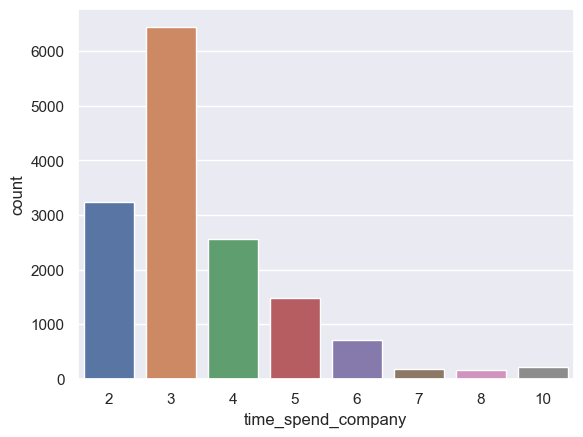

In [742]:
# Show the plot for the count of years here
sns.countplot(data=df,x='time_spend_company')

**Question: What is the maximum number of time spend by the employees?**

Answer: Employees has spend maximum of 10 years at the company.

In [743]:
# Write the code here to get the percentage of employees leaving.
total_employees = df.shape[0] 
emp_left = df['left'].value_counts()[1]
per_left_emp = emp_left/total_employees*100
print(f"percentage of employees leaving: {per_left_emp}")

percentage of employees leaving: 23.80825388359224


<Axes: xlabel='time_spend_company', ylabel='left'>

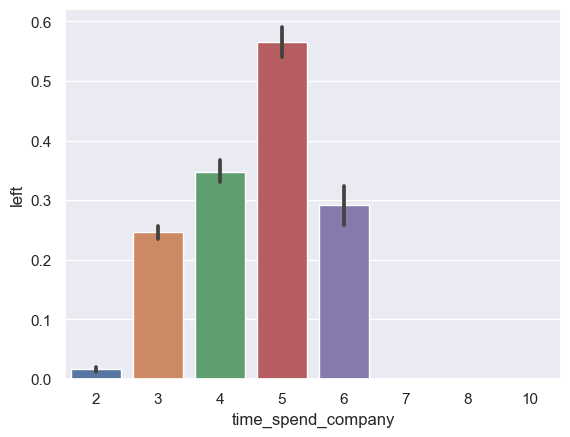

In [744]:
# Write the code here to draw a bar plot showing years after which employees are likely to leave

sns.barplot(data=df,x='time_spend_company',y=df['left'])

**Question: After what time period are employees most likely to leave the company ?**

Answer: After 5 years spend at the company employees are most likely to leave.

## **Employees engaged in any work accident**

**Task 7: Find out that how many employees were engaged in work accident and how many of them actually left? Use count plots to show your results**

<Axes: xlabel='Work_accident', ylabel='count'>

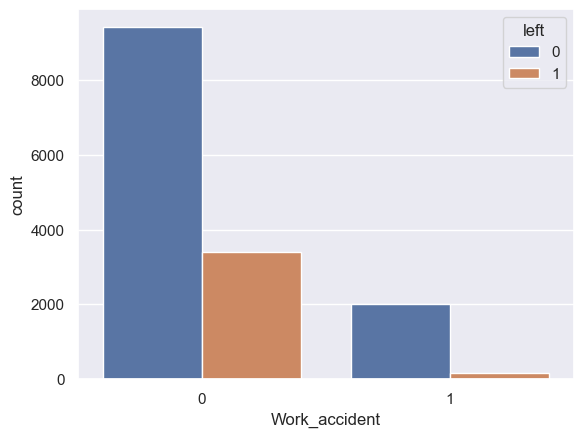

In [745]:
# Number of employees involved in work accident
sns.countplot(data=df,x='Work_accident',hue='left')

In [746]:
df.loc[df['Work_accident']==1,'Work_accident'].count()

2169

**Question: What can you conclude from the graph above?**

Answer: From the above graph we can observe 2169 empolyees were engaged in work accident

<Axes: xlabel='time_spend_company', ylabel='left'>

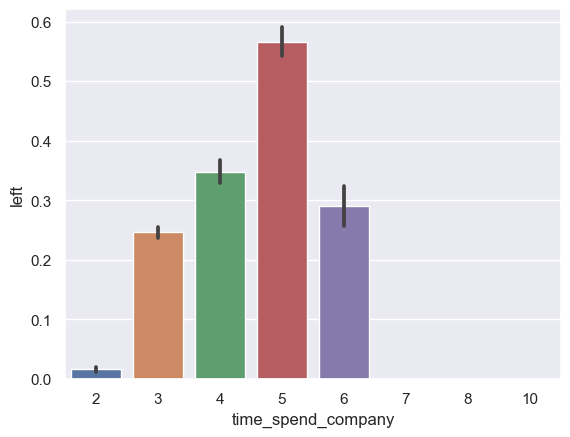

In [747]:
sns.barplot(data=df,x='time_spend_company',y='left')

In [748]:
# Number of employees involved in work accident and left or not left
#plt.figure(figsize=(6,3))
#sns.countplot(data=df,x='Work_accident',hue='left')
df.loc[df['Work_accident']==1].groupby('left')['Work_accident'].count()

left
0    2000
1     169
Name: Work_accident, dtype: int64

## **Promotions in last 5 years**

**Task 8: How many number of employees got the promotion in last 5 year and how many of them left?**

In [749]:
# Write code here
promo = df[df['promotion_last_5years']==1]
promo_left = promo[promo['left']==1]
print('Promotion:',promo.shape[0])
print('left after promotion:',promo_left.shape[0])

Promotion: 319
left after promotion: 19


**Answer:** Number of employees who got the promotion in last 5 year are 319 and 19 of them left

## **Salary trends**

**Task 9: What are the salary trends in the data? Use graphical representation for explanation**

<Axes: xlabel='salary', ylabel='count'>

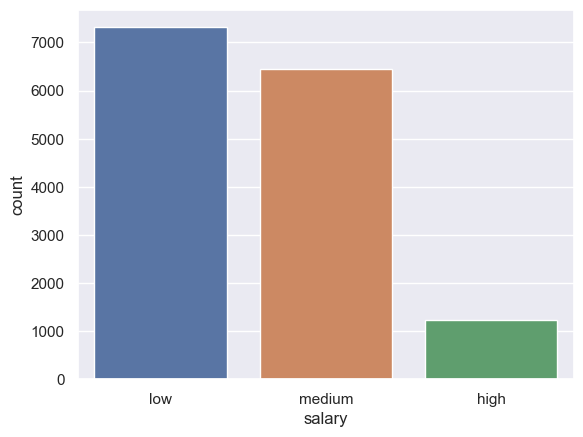

In [750]:
#Write code here
sns.countplot(data=df,x='salary')

Answer: Employees at low salary are most in numbers. Their count is more than 7000 and after that medium salaried employees count is just above 6000 and at last highly paid employees are least in numbers just above 1000.

**Quesion: Which type salary holders are most likely to leave? Try to show the percentage of employees who left according to their salaries, using a bar plot or as you like.**

In [751]:
# Write code here
emp_left = df[df['left']==1]
emp_left.groupby('salary')['left'].count() 


salary
high        82
low       2172
medium    1317
Name: left, dtype: int64

<Axes: xlabel='salary', ylabel='left'>

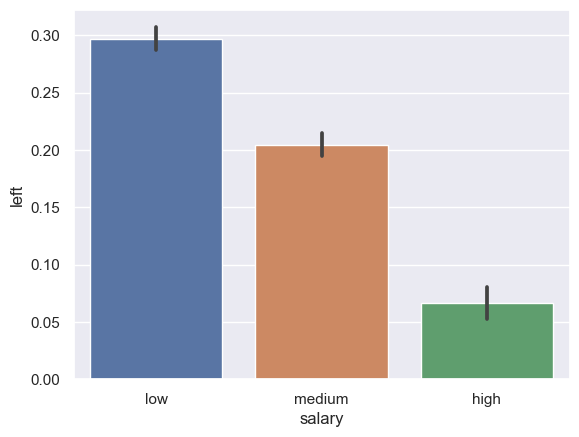

In [752]:
# Write code here for plot
sns.barplot(data=df,x='salary',y='left')

**Question: What does the above plot show?**

Answer: Above plot show about low salaried employees were the most to  30% of employees  left the company.

## **Employees per Department**

**Task 10: Find out employees per department and also see which which department has highest number of employees leaving the company.**

In [753]:
# Write the code here to check employee count in each department. You can use a graphical representation or use simple code to check.
df.groupby('dept')['left'].count()

dept
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: left, dtype: int64

<Axes: xlabel='dept', ylabel='count'>

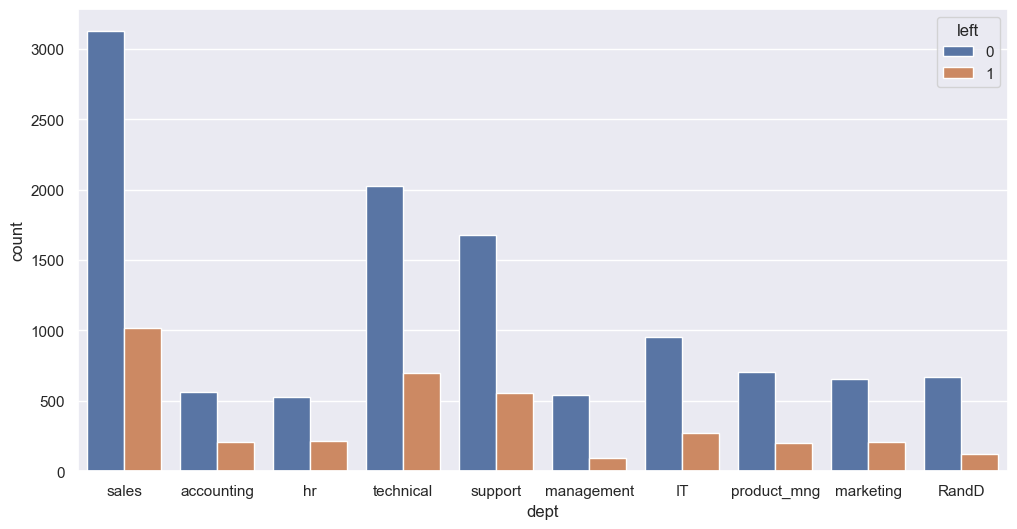

In [754]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='dept',hue='left')

**Question: Which department has maximum number of employees?**

Answer: Sales department has maximum number of employees that is 4140. Out of these 1014 left from the sales department.

**Question: Which department has highest percentage of turn-over? Use graphical representation to find out.**

In [755]:
# Write code here
total_employees = df.value_counts().sum()
turnover_by_department = df.groupby('dept')['left'].sum()
turnover_percentage_by_department = (turnover_by_department / total_employees) * 100
sorted_data = turnover_percentage_by_department.sort_values(ascending=False)
sorted_data

dept
sales          6.760451
technical      4.646976
support        3.700247
IT             1.820121
hr             1.433429
accounting     1.360091
marketing      1.353424
product_mng    1.320088
RandD          0.806720
management     0.606707
Name: left, dtype: float64

Text(0.5, 1.0, 'Turnover Percentage by Department')

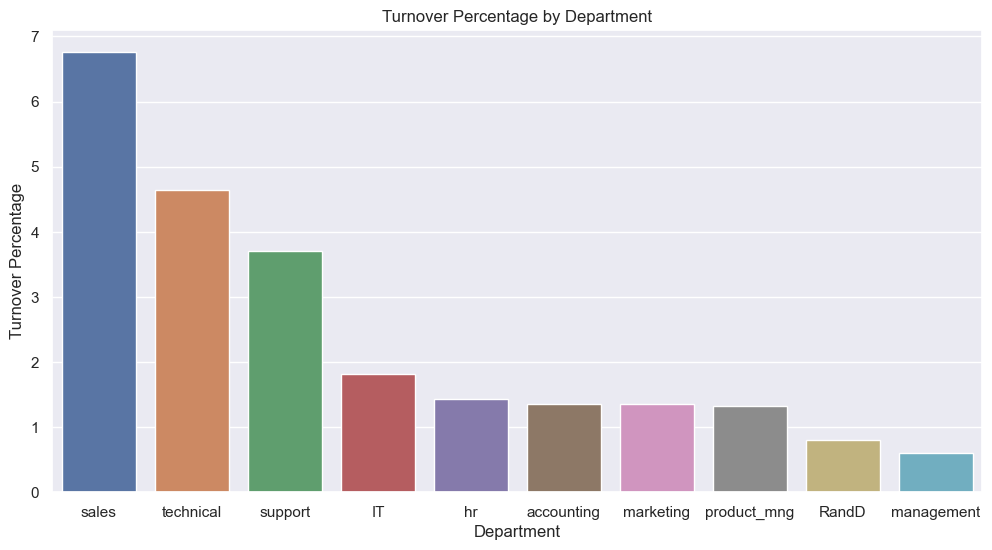

In [756]:
# Write code here to draw the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_data.index, y=sorted_data.values)
plt.xlabel('Department')
plt.ylabel('Turnover Percentage')
plt.title('Turnover Percentage by Department')

Answer: From the above plot we can observe hightest turnover percentage **6.76%** is from **Sales department**.

## **Satisfaction Level**

**Task 11: Show the satisfaction level of employees who left the company and those who didn't leave, using a kde plot**

<Axes: xlabel='satisfaction_level', ylabel='Density'>

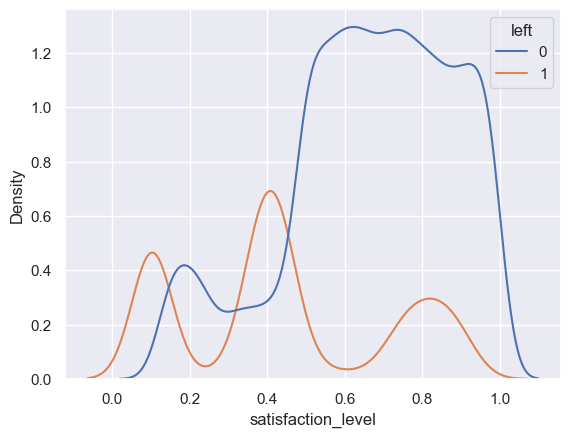

In [758]:
# Write the code here
sns.kdeplot(data=df,x='satisfaction_level',hue='left')

**Question: What can you conclude from the plot above?**

Answer: From the above plot it seams that empolyees with satisfaction level less than 0.5 are more likely to leave as the satisfaction level increase the number of employees working also increases. So satisfaction level seams to plays major role in the  turnover.

# Feature Engineering

For feature engineering we will two new features. Looking at the the satisfcation we can conclude that people who are leaving have a low satisfaction level, most likely below 0.5 are leaving and people having a high satisfaction_level, most likely above 0.5 are likely to stay. 

**Task 12: Make a new feature 'satisfaction_level_type' through following conditions:**<br>
- **satisfaction_level >= 0.5 then satisfaction_level_type = 'High'**
- **satisfaction_level < 0.5 then satisfaction_level_type = 'Low'**

In [759]:
# Write the code here to make bins as mentioned above
df['satisfaction_level_type'] = df['satisfaction_level']
for index,value in enumerate(df['satisfaction_level_type']):
    if (value >= 0.5):
        df['satisfaction_level_type'][index] = 'High'
    else:
        df['satisfaction_level_type'][index] = 'Low'

C:\Users\ishaq\AppData\Local\Temp\ipykernel_17432\629358215.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['satisfaction_level_type'][index] = 'Low'


In [760]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,satisfaction_level_type
0,0.38,0.53,2,157,3,0,1,0,sales,low,Low
1,0.80,0.86,5,262,6,0,1,0,sales,medium,High
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Low
3,0.72,0.87,5,223,5,0,1,0,sales,low,High
4,0.37,0.52,2,159,3,0,1,0,sales,low,Low


**Task 13: Make a count plot for satisfaction_level_type and and see which type has more turn over using hue='left'**

<Axes: xlabel='satisfaction_level_type', ylabel='count'>

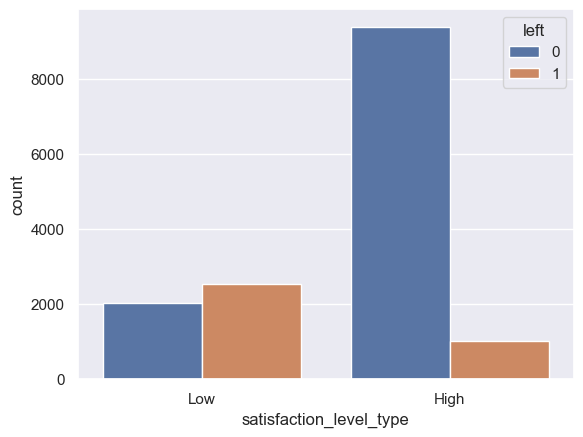

In [761]:
# Write Code Here
sns.countplot(data=df,x='satisfaction_level_type',hue='left')

Previously we saw that employees having high number of projects are leaving. We also saw that some employees with extremely less number of projects are also leaving the company. Let us see how number of projects and satisfaction level are related.<br>
We can see this by checking the satisfaction level type and number of projects in according to that specific type. 

In [762]:
# Write Code Here
df.groupby('number_project')['satisfaction_level_type'].value_counts()

number_project  satisfaction_level_type
2               Low                        1797
                High                        591
3               High                       3504
                Low                         551
4               High                       3807
                Low                         558
5               High                       2281
                Low                         480
6               Low                         946
                High                        228
7               Low                         251
                High                          5
Name: satisfaction_level_type, dtype: int64

**Make a Plot of your findings**

<Axes: xlabel='number_project', ylabel='count'>

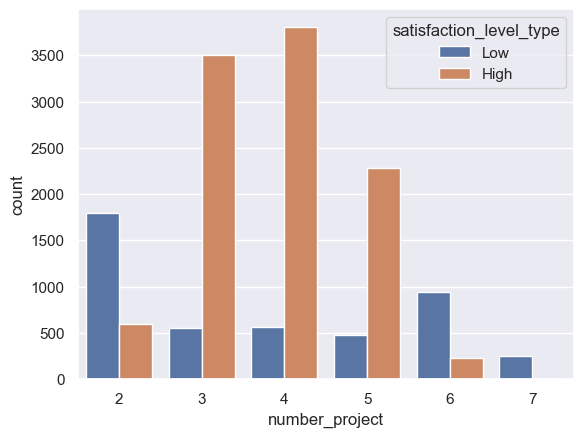

In [763]:
sns.countplot(data=df,x='number_project',hue='satisfaction_level_type')

**Question:** What did you infer drom the above plot

**Answer:** From the above plot we can observe that the employees with 3,4 and 5 number projects are mostly satisfied employees. While rest to the employees are mostly not satisfied. So number of projects done by the employees is an important factor for the satisfaction of the employees

Now lets check number of projects for low satisfaction level

In [764]:
# Write Code Here
df[df['satisfaction_level_type']=='Low'].groupby('satisfaction_level_type')['number_project'].sum()

satisfaction_level_type
Low    17312
Name: number_project, dtype: int64

Notice that there is are people associated with low satisfaction level, have either too less projects, i.e. number of projects = 2 or high number of projects i.e. 6 or even 7. The over all count for 7 is low but there is a significant raise if we compare its count with higher satisfaction level.

**Task 14: Make a new column 'employee_type' and assign categories as following:**<br>
- **If number of projects is equal to 2 then employee_type='unburdened'**
- **If number of projects is between 3 and 5 then employee_type = 'Satisfactory'**
- **If number of projects is 6 and above then employee_type='Burdened'**

In [765]:
# Write code here
df['employee_type']=''
df.loc[df['number_project']==2, 'employee_type']= df.loc[df['number_project']==2,'employee_type'].replace('','unburdened') 
df.loc[(df['number_project']>=6) & (df['number_project']<=7), 'employee_type']=df.loc[(df['number_project']>=6) & (df['number_project']<=7),'employee_type'].replace('','Burdened')
df.loc[(df['number_project']>=3) & (df['number_project']<=5), 'employee_type']=df.loc[(df['number_project']>=3) & (df['number_project']<=5),'employee_type'].replace('','Satisfactory')

### Remove Redundant Features

Hint: Look for the columns used in Feature Engineering

In [766]:
# Write code here
df_clean= df.drop(['satisfaction_level','number_project'],axis='columns')

In [767]:
df_clean

,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,satisfaction_level_type,employee_type
0,0.53,157,3,0,1,0,sales,low,Low,unburdened
1,0.86,262,6,0,1,0,sales,medium,High,Satisfactory
2,0.88,272,4,0,1,0,sales,medium,Low,Burdened
3,0.87,223,5,0,1,0,sales,low,High,Satisfactory
4,0.52,159,3,0,1,0,sales,low,Low,unburdened
...,...,...,...,...,...,...,...,...,...,...
14994,0.57,151,3,0,1,0,support,low,Low,unburdened
14995,0.48,160,3,0,1,0,support,low,Low,unburdened
14996,0.53,143,3,0,1,0,support,low,Low,unburdened
14997,0.96,280,4,0,1,0,support,low,Low,Burdened


# Machine Learning

Before moving further, we need to apply one-hot encoding on categorical variables i.e. **dept, salary, satisfaction_level_type,** and **employee_type**

**Task 16: Do ONE HOT ENCODING of the above mentioned variables**

In [768]:
# Write code here
df_OneHot = pd.get_dummies(df_clean,columns=['dept','salary','satisfaction_level_type','employee_type'])


In [769]:
df_OneHot

,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,...,dept_support,dept_technical,salary_high,salary_low,salary_medium,satisfaction_level_type_High,satisfaction_level_type_Low,employee_type_Burdened,employee_type_Satisfactory,employee_type_unburdened
0,0.53,157,3,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,0.86,262,6,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
2,0.88,272,4,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,0.87,223,5,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0.52,159,3,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.57,151,3,0,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
14995,0.48,160,3,0,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
14996,0.53,143,3,0,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
14997,0.96,280,4,0,1,0,0,0,0,0,...,1,0,0,1,0,0,1,1,0,0


**Task 17: Creating Independant and Dependant Variables**

In [770]:
# Write code here
X= df_OneHot.drop('left',axis='columns')
Y= df_OneHot['left']

**Scaling Variables**

In [771]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x_scaled_minmax = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled_minmax, columns = X.columns)
X.head()

,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,...,dept_support,dept_technical,salary_high,salary_low,salary_medium,satisfaction_level_type_High,satisfaction_level_type_Low,employee_type_Burdened,employee_type_Satisfactory,employee_type_unburdened
0,0.265625,0.285047,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.781250,0.775701,0.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.812500,0.822430,0.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.796875,0.593458,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.250000,0.294393,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


**Task 18: Perform Train Test Split with test size 30 percent and random state = 100**

In [772]:
from sklearn.model_selection import train_test_split

In [773]:
#Write code here
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,shuffle=True,random_state=100)

In [774]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape,ytest.shape)

(10499, 23) (10499,)
(4500, 23) (4500,)


**Task 19: Get the predictions using the following models.**<br>
- Random Forest
- Logistic Regression
- Ada Boost
- XG Boost

<br> 

**Also get the following scores for each of the above models**
- Accuracy
- Precision
- Recall
- F1-Score
- Classification Report

## Random Forest

In [775]:
# Importing the model from sklearn
from sklearn.ensemble import RandomForestClassifier

In [844]:
# Making instance and training the model
rf = RandomForestClassifier(max_depth=22, min_samples_leaf=1, n_estimators= 52,random_state=100)
rf.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=22, n_estimators=52, random_state=100)

In [845]:
# Get predictions
rf_pred= rf.predict(xtest)

In [846]:
rf_pred[0:10]

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

**Precision**

In [847]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import precision_score

In [848]:
#Write the code to calculate
rf_precision= precision_score(ytest,rf_pred)
print("Precision: {}".format(rf_precision))

Precision: 0.9742410303587856


**Accuracy**

In [849]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import accuracy_score

In [850]:
# Write the code to calculate
rf_acc= accuracy_score(ytest,rf_pred)
print("Accuracy: {}".format(rf_acc))

Accuracy: 0.9848888888888889


**Recall**

In [851]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import recall_score

In [852]:
# Write the code to calculate
rf_recall= recall_score(ytest,rf_pred)
print("Recall: {}".format(rf_recall))

Recall: 0.9636032757051866


**F1-Score**

In [853]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import f1_score

In [854]:
# Write the code to calculate
rf_f1_score= f1_score(ytest,rf_pred)
print("f1 score: {}".format(rf_f1_score))

f1 score: 0.9688929551692589


**Classification Report**

In [855]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import classification_report

In [856]:
#Write the code to calculate
print(classification_report(ytest, rf_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3401
           1       0.97      0.96      0.97      1099

    accuracy                           0.98      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.98      0.98      0.98      4500



**Confusion matrix**

In [914]:
confusion_matrix(ytest, rf_pred)

array([[3373,   28],
       [  40, 1059]], dtype=int64)

In [915]:
tn, fp, fn, tp = confusion_matrix(ytest, rf_pred).ravel()
conf_matrix = pd.DataFrame({"pred_Churn": [tp, fp], "pred_Not Churn": [
                           fn, tn]}, index=["Churned", "Not churned"])

In [916]:
conf_matrix

,pred_Churn,pred_Not Churn
Churned,1059,40
Not churned,28,3373


## Logistic Regression

In [860]:
# Import the model
from sklearn.linear_model import LogisticRegression

In [861]:
# Create instance and train, random _state=100
lr = LogisticRegression(max_iter=400,random_state=100)
lr.fit(xtrain,ytrain)


LogisticRegression(max_iter=400, random_state=100)

In [862]:
# get the predictions
lr_pred= lr.predict(xtest)

**Accuracy**

In [863]:
#Write the code here
lr_accuracy= accuracy_score(ytest, lr_pred)
print("Accuracy: {}".format(lr_accuracy))

Accuracy: 0.86


**Precision**

In [864]:
#Write the code here
lr_precision= precision_score(ytest,lr_pred)
print("Precision: {}".format(lr_precision))

Precision: 0.7283349561830574


**Recall**

In [865]:
#Write the code here
lr_recall= recall_score(ytest,lr_pred)
print("Recall: {}".format(lr_recall))

Recall: 0.6806187443130118


**F1 Score**

In [866]:
#Write the code here
lr_f1_score= f1_score(ytest,lr_pred)
print("f1 Score: {}".format(lr_f1_score))

f1 Score: 0.7036688617121355


**Confusion Matrix**

In [867]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, lr_pred)

array([[3122,  279],
       [ 351,  748]], dtype=int64)

In [868]:
confusion_matrix(ytest, lr_pred).ravel()

array([3122,  279,  351,  748], dtype=int64)

In [869]:
tn, fp, fn, tp = confusion_matrix(ytest, lr_pred).ravel()
conf_matrix = pd.DataFrame({"pred_Churn": [tp, fp], "pred_Not Churn": [
                           fn, tn]}, index=["Churned", "Not churned"])

In [870]:
conf_matrix

,pred_Churn,pred_Not Churn
Churned,748,351
Not churned,279,3122


**Classification Report**

In [871]:
#Write the code here
print(classification_report(ytest,lr_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3401
           1       0.73      0.68      0.70      1099

    accuracy                           0.86      4500
   macro avg       0.81      0.80      0.81      4500
weighted avg       0.86      0.86      0.86      4500



## Ada Boost

In [872]:
#Write the code here to import the model
from sklearn.ensemble import AdaBoostClassifier

In [873]:
#Write the code here to make an instance and train the model with random state =100
ab = AdaBoostClassifier()
ab.fit(xtrain,ytrain)

AdaBoostClassifier()

In [874]:
# Get the predictions
pred_clf_adb= ab.predict(xtest)

**Accuracy**

In [875]:
#Write code here
ab_accuracy= accuracy_score(ytest,pred_clf_adb)
print("Accuracy: {}".format(ab_accuracy))

Accuracy: 0.928


**Precision**

In [876]:
#Write code here
ab_precision= precision_score(ytest,pred_clf_adb)
print("Precision: {}".format(ab_precision))

Precision: 0.8611369990680335


**Recall**

In [877]:
#Write code here
ab_recall= recall_score(ytest,pred_clf_adb)
print("Recall: {}".format(ab_recall))

Recall: 0.8407643312101911


**F1-Score**

In [878]:
#Write code here
ab_f1_score=f1_score(ytest,pred_clf_adb)
print("F1-Score: {}".format(ab_f1_score))

F1-Score: 0.850828729281768


**Classification Report**

In [879]:
#Write code here
print(classification_report(ytest,pred_clf_adb))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3401
           1       0.86      0.84      0.85      1099

    accuracy                           0.93      4500
   macro avg       0.91      0.90      0.90      4500
weighted avg       0.93      0.93      0.93      4500



## XG Boost

In [880]:
#Write the code here to import the model
import xgboost as xgb

In [829]:
#Write the code here to make an instance and train the model with random state =100
xg =xgb.XGBClassifier(learning_rate=0.25,seed=25,nthread=1,max_depth=18,n_estimators=300)
xg.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=18, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, nthread=1, num_parallel_tree=None,
              predictor=None, ...)

In [830]:
# Get the predictions
pred_clf_xgb= xg.predict(xtest)

**Accuracy**

In [881]:
#Write code here
xgb_accuracy= accuracy_score(ytest,pred_clf_xgb)
print("Accuracy: {}".format(xgb_accuracy))

Accuracy: 0.9831111111111112


**Precision**

In [832]:
#Write code here
xgb_precision= precision_score(ytest,pred_clf_xgb)
print("Precision: {}".format(xgb_precision))

Precision: 0.9637352674524026


**Recall**

In [833]:
#Write code here
xgb_recall= recall_score(ytest,pred_clf_xgb)
print("Recall: {}".format(xgb_recall))

Recall: 0.9672429481346679


**F1-Score**

In [834]:
#Write code here
xgb_f1_score= f1_score(ytest,pred_clf_xgb)
print("F1 score: {}".format(xgb_f1_score))

F1 score: 0.9654859218891917


**Classification Report**

In [835]:
#Write code here
xgb_report= classification_report(ytest,pred_clf_xgb)
print(xgb_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3401
           1       0.96      0.97      0.97      1099

    accuracy                           0.98      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.98      0.98      0.98      4500



**Confusion Matrix**

In [894]:
confusion_matrix(ytest, pred_clf_xgb)

array([[3361,   40],
       [  36, 1063]], dtype=int64)

In [895]:
tn, fp, fn, tp = confusion_matrix(ytest, pred_clf_xgb).ravel()
conf_matrix = pd.DataFrame({"pred_Churn": [tp, fp], "pred_Not Churn": [
                           fn, tn]}, index=["Churned", "Not churned"])

In [896]:
conf_matrix

,pred_Churn,pred_Not Churn
Churned,1063,36
Not churned,40,3361


# Result Comparisons

**Task 20: Do the comparison of the above used models as per the scores found.Make a datafram that shows the models and scores for each models.**

In [882]:
# Write the code here
comparison_dict={"Algorithm":["Random Forest","Logistic Regression","Ada Boost","XGBoost",],
                 "Accuracy":[rf_acc,lr_accuracy,ab_accuracy,xgb_accuracy],
                 "Precision":[rf_precision,lr_precision,ab_precision,xgb_precision],
                 "Recall":[rf_recall,lr_recall,ab_recall,xgb_recall],
                 "F1 Score":[rf_f1_score,lr_f1_score,ab_f1_score,xgb_f1_score]
                }

In [883]:
final_report = pd.DataFrame(comparison_dict)

In [884]:
final_report.sort_values(['Recall', 'Accuracy', 'Precision'], ascending=False)

,Algorithm,Accuracy,Precision,Recall,F1 Score
3,XGBoost,0.983111,0.963735,0.967243,0.965486
0,Random Forest,0.984889,0.974241,0.963603,0.968893
2,Ada Boost,0.928000,0.861137,0.840764,0.850829
1,Logistic Regression,0.860000,0.728335,0.680619,0.703669


In [885]:
rf_AvgScore=(rf_acc+rf_precision+rf_recall+rf_f1_score)/4
xg_AvgScore=(xgb_accuracy+xgb_precision+xgb_recall+xgb_f1_score)/4

In [890]:
print(f'Random Forest Overall Score: {rf_AvgScore}, XGBoost overall Score: {xg_AvgScore}')

Random Forest Average Score: 0.9729065375305299, XGBoost Average Score: 0.9698938121468433


**Task 21: Which model has the best score? Do you think that you need to apply any sort of tunning on the model selected. If Yes, then apply it conclude with the final scores of the best model.**

**Answer:** After thorough experimentation and evaluation of various classification algorithms, *XGBoost* is demonstrating the best results althrough *Random Forest* results are also fine. So both of these models are considered to be hypertunned to check further imporvement in the results. After applying Hyperparameter tunning using GridSearchCV it is evident that *Random Forest* is the best model. Although from domain knowledge we get that false negative is critical so our *Recall score* should be more high, XGBoost is having high Recall Score but the reason for selecting Random Forest is that the difference is slight and we cannot decide on that basis. But if we compare both of the Model's overall scores *Random Forest* is performing better as its accuracy, precision and f1 scores are slightly better.

In [910]:
final_report['Average Score'] = rf_AvgScore
final_report.loc[final_report['Algorithm']=='Random Forest']

,Algorithm,Accuracy,Precision,Recall,F1 Score,Average Score
0,Random Forest,0.984889,0.974241,0.963603,0.968893,0.972907


**ROC CURVE**

In [911]:
from plot_roc_curve import plot_roc_curve

In [912]:
from sklearn.metrics import auc, roc_curve, roc_auc_score

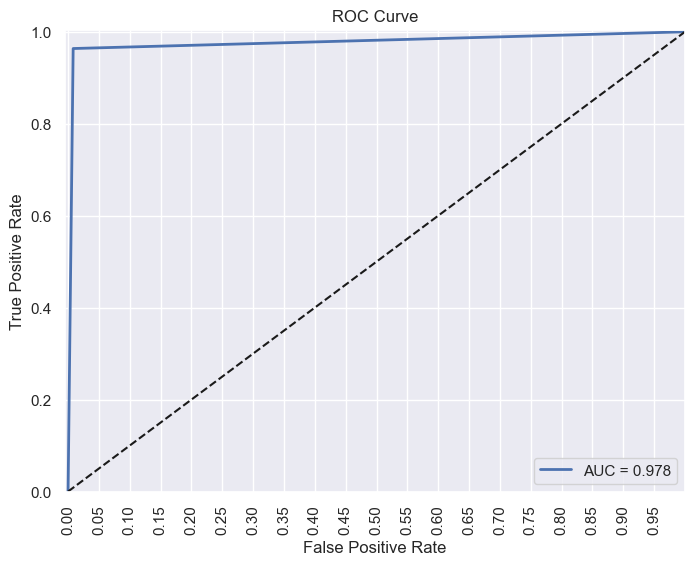

In [913]:
auc_rf=roc_auc_score(ytest,rf_pred)
fpr,tpr,threshold=roc_curve(ytest,rf_pred)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_rf)

**Appyling GridSearchCV**

from sklearn.model_selection import GridSearchCV

In [600]:
param_grid1 = {"n_estimators": [50, 52, 54, 56, 58],
               "max_depth": [20, 22, 25, 27, 30],
               "min_samples_leaf": [1, 2, 3, 4, 5]}

RF = RandomForestClassifier(random_state=100)
# Instantiate the GridSearchCV object: logreg_cv
RF_cv1 = GridSearchCV(RF, param_grid1, cv=5, scoring='accuracy', n_jobs=4)

# Fit it to the data
RF_cv1.fit(xtrain, ytrain)

# RF_cv1.cv_results_,
RF_cv1.best_params_, RF_cv1.best_score_

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100), n_jobs=4,
             param_grid={'max_depth': [20, 22, 25, 27, 30],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [50, 52, 54, 56, 58]},
             scoring='accuracy')

In [601]:
param_grid1 = {"learning_rate": [0.1, 0.01, 0.001],
               "n_estimators": [100,200,300],
               "max_depth": [10, 15, 20],
               "min_child_weight": [1, 2, 3]}

xg = xgb.XGBClassifier(seed=25,colsample_bytree=1)

xg_cv1 = GridSearchCV(xg, param_grid1, cv=5, scoring='accuracy', n_jobs=-1)

# Fit it to the data
xg_cv1.fit(xtrain, ytrain)

# XG_cv1.cv_results_,
xg_cv1.best_params_, xg_cv1.best_score_

In [898]:
xg_cv1.best_params_, xg_cv1.best_score_

({'learning_rate': 0.1,
  'max_depth': 20,
  'min_child_weight': 1,
  'n_estimators': 200},
 0.9808553192068482)